# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 3  AC 209 : Linear Algebra, Accuracy, and Confidence Intervals


**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner

<hr style="height:2pt">


In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- Restart the kernel and run the whole notebook again before you submit. 
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed.

<hr style="height:2pt">

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

<hr style="height:2pt">
<hr style="height:2pt">

<div class='theme'> <b>Linear Algebra, Accuracy, and Confidence Intervals</b> </div>

In this part of the homework, you will see how *uncertainty* in the $\beta$ coefficients can directly impact our ability to make predictions with a linear regression model and how in general we can do inference on the predictors. 

The data for this supplement are imported for you in the cells below.

First a little review. The linear model assumes:
$$ y_i \sim N(\beta_0+\beta_1 x_i,\sigma^2 )   $$

This means, pun intended, that $ \mu_{y_i} = \beta_0+\beta_1 x_i $, which can be estimated with $ \hat{\mu}_{y_i} = \hat{\beta}_0+\hat{\beta}_1 x_i $.

And for a new observation not in the data set, once we measure the new predictor value, $x^*$, we can predict its response, $y^*$, from our model as:
$$\hat{y}^* = \hat{\mu}_{y_i} + \hat{\varepsilon}^* $$

Which can be calculated by using the estimate for $\hat{\mu}_{y_i}$ and adding on a randomly selected value for $\hat{\varepsilon}^*$ from its assumed (and estimated) distribution, $N(0,\hat{\sigma}^2)$.


In [3]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("data/cleaned_mtcars.csv")
df.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
y = df[['mpg']].values
X = df[['cyl','disp','hp','wt','qsec']]


X = sm.add_constant(X)

/home/ll/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


---- 


<div class='exercise'> <b> Question 1 [20 pts] </b>

**1.1** Fit a simple linear regression model predicting `mpg` via `disp`. Use the `FittedOLS.get_prediction().summary_frame()` method to access the confidence intervals for our true mean predictions at various values of `disp` and make a well-labeled plot showing
 1. The observed values of `disp` and `mpg`.
 2. The estimated regression line.
 3. The upper and lower bounds of the 95% confidence interval for the true average (not the observed) `mpg` at any given displacement.
 
**1.2** Why do we have a confidence interval for our true mean prediction values?  Why isn't the mean prediction just a single number?

**1.3** Someone asks what mean `mpg` you would predict for a `disp` value of 400. What do you tell them?  Paying attention to the confidence interval (1.1.3) above?

**1.4** Why does the 95% confidence interval for the mean predicted `mpg` appear to curve as we move away from the data's center? 

**1.5** An alternative way to produce the confidence intervals from 1.1 is through the bootstrap.  Create 100 bootstrap samples in order to create 100 bootstrapped regression models and store their estimated intercept and slope values.  Use these bootstrapped estimates to build the 95\% confidence intervals as in 1.1, and recreate the plot from that question with your new bootstrapped confidence intervals.  Compare this new plot to the one from 1.1.

**1.6** Another interval of uncertainty in a regression model is called a *prediction interval*.  A prediction interval gives a range of plausible values for a future individual observation, $\hat{y}^*$, given a specific value of $x$ in general (`disp` here).  How should the 95\% prediction interval calculated at a `disp` value of 400 compare to the corresponding 95\% confidence interval for the mean predicted `mpg`?  Justify with a few sentences.
    
 </div>

### Answers

<div class='exercise-r'>  
 
**1.1** Fit a simple linear regression model predicting `mpg` via `disp`. Use the `FittedOLS.get_prediction().summary_frame()` method to access the confidence intervals for our true mean predictions at various values of `disp` and make a well-labeled plot showing
 1. The observed values of `disp` and `mpg`.
 2. The estimated regression line.
 3. The upper and lower bounds of the 95% confidence interval for the true average (not the observed) `mpg` at any given displacement.
 
 </div>

/home/ll/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


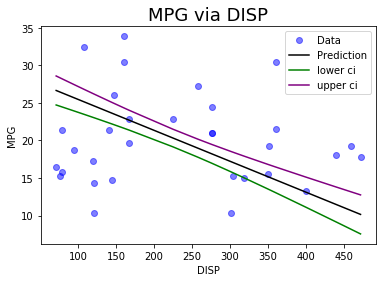

In [7]:
# your code here 
X = df.sort_values(['disp'])['disp']
X_const = sm.add_constant(X)

y = df.sort_values(by='disp')['mpg']
#print(X, y)

model = sm.OLS(y, X_const)
results = model.fit()
y_pred = results.predict(X_const)

c = results.get_prediction().summary_frame()
#print(c)

f, axes = plt.subplots()

axes.plot(df[['disp']], y, 'bo', alpha = 0.5, label = 'Data')
axes.plot(X, y_pred, 'k-', label = 'Prediction')
axes.set_title('MPG via DISP', fontsize = 18)

#print(X.shape, (c['mean_ci_lower']).shape)
#sorted_disp.head()
axes.plot(X, c['mean_ci_lower'], color = 'green', label = "lower ci" )
axes.plot(X, c['mean_ci_upper'], color = 'purple', label = "upper ci" )
axes.set_xlabel("DISP")
axes.set_ylabel("MPG")
axes.legend()

ind_400 = (X.loc[X == 400].index)[0]
msp_lci = c.loc[ind_400]['mean_ci_lower']
msp_uci = c.loc[ind_400]['mean_ci_upper']

<div class='exercise-r'>  
 
**1.2** Why do we have a confidence interval for our true mean prediction values?  Why isn't the mean prediction just a single number?
 
 </div>

We have a confidence interval for our true mean prediction values because of the reducible error in the model. The $\hat{\beta}$'s found by our model may not align with the $\beta$'s of the true population regression. The confidence interval measures that uncertainty in our model.

<div class='exercise-r'>  
 
**1.3** Someone asks what mean `mpg` you would predict for a `disp` value of 400. What do you tell them?  Paying attention to the confidence interval (1.1.3) above?
 
 </div>

We would say that we are 95% confident that the mean mpg is between 11.1 and 15.1. 

*Your answer here*

<div class='exercise-r'>  
 
**1.4** Why does the 95% confidence interval for the mean predicted `mpg` appear to curve as we move away from the data's center?
 
 </div>

The 95% confidence will be smallest around the mean X value of our observations because this is the most "stable" point in the model. As we move away from that point, chages in the $\beta$ values will have a larger effect on our predicted mean value, so the 95% confidence interval will increase. 

<div class='exercise-r'>  
 
**1.5** An alternative way to produce the confidence intervals from 1.1 is through the bootstrap.  Create 100 bootstrap samples in order to create 100 bootstrapped regression models and store their estimated intercept and slope values.  Use these bootstrapped estimates to build the 95\% confidence intervals as in 1.1, and recreate the plot from that question with your new bootstrapped confidence intervals.  Compare this new plot to the one from 1.1.
 
 </div>

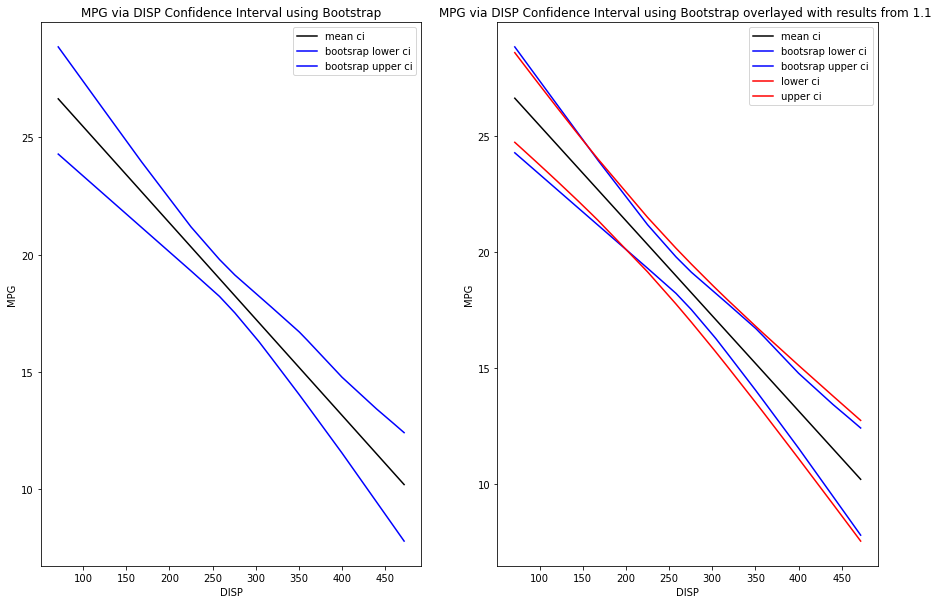

In [23]:
# your code here
def bootstrap(df):
    selectionIndex = np.random.randint(df.shape[0], size = df.shape[0])
    new_df = df.iloc[selectionIndex]
    return new_df

boot_strap = 100
intercept, slope = [], []
#bootarray = np.empty([len(df['disp']), 101])
#bootarray[:,0] = X
bootDF = pd.DataFrame(X)
#print(bootDF)

for i in range(boot_strap):
    df_new = bootstrap(df)
    X_new = df_new.sort_values(['disp'])['disp']
    X_const = sm.add_constant(X_new)

    y = df_new.sort_values(by='disp')['mpg']
    #print(X, y)

    model = sm.OLS(y, X_const)
    results = model.fit()
    y_pred = results.predict(X_const)
    
    disp_slope = results.params['disp']
    disp_inter = results.params['const']
    
    intercept.append(disp_inter)
    slope.append(disp_slope)
    
    #bootarray[:,i] = disp_slope*df['disp']+ disp_inter
    bootDF[i] = disp_slope*bootDF['disp']+ disp_inter
    
    
#print(bootDF.head())
sub_view = bootDF.loc[:, bootDF.columns != 'disp']
bootDF['lower_ci'] = sub_view.apply(lambda x: np.percentile(x,2.5),axis=1)
bootDF['upper_ci'] = sub_view.apply(lambda x: np.percentile(x,97.5),axis=1)
#print(bootDF[['disp','lower_ci','upper_ci']])   


meanslope = np.mean(slope)
meaninter = np.mean(intercept)

f, axes = plt.subplots(1,2, figsize=(15,10))

axes[0].plot(bootDF['disp'], bootDF['disp']*meanslope+meaninter, color = 'black', label = "mean ci" )
axes[0].plot(bootDF['disp'], bootDF['lower_ci'], color = 'blue', label = "bootsrap lower ci" )
axes[0].plot(bootDF['disp'], bootDF['upper_ci'], color = 'blue', label = "bootsrap upper ci" )
axes[0].set_title("MPG via DISP Confidence Interval using Bootstrap")
axes[0].set_xlabel("DISP")
axes[0].set_ylabel("MPG")
axes[0].legend()

axes[1].plot(bootDF['disp'], bootDF['disp']*meanslope+meaninter, color = 'black', label = "mean ci" )
axes[1].plot(bootDF['disp'], bootDF['lower_ci'], color = 'blue', label = "bootsrap lower ci" )
axes[1].plot(bootDF['disp'], bootDF['upper_ci'], color = 'blue', label = "bootsrap upper ci" )
axes[1].set_title("MPG via DISP Confidence Interval using Bootstrap overlayed with results from 1.1 ")
axes[1].set_xlabel("DISP")
axes[1].set_ylabel("MPG")
axes[1].legend()

axes[1].plot(X, c['mean_ci_lower'], color = 'red', label = "lower ci" )
axes[1].plot(X, c['mean_ci_upper'], color = 'red', label = "upper ci" )
axes[1].set_xlabel("DISP")
axes[1].set_ylabel("MPG")
axes[1].legend()


*Your answer here*

<div class='exercise-r'>  
 
**1.6** Another interval of uncertainty in a regression model is called a *prediction interval*.  A prediction interval gives a range of plausible values for a future individual observation, $\hat{y}^*$, given a specific value of $x$ in general (`disp` here).  How should the 95\% prediction interval calculated at a `disp` value of 400 compare to the corresponding 95\% confidence interval for the mean predicted `mpg`?  Justify with a few sentences.
 
 </div>

The 95% prediction interval at disp value of 400 will be much larger than the 95% confidence interval at that same value. The 95% confidence only accounts for the error of our model in predicting the true mean of the data. However, our observations have some distribution around the true mean which will add some irreducible error. This error and the model error will be accounted for in the 95% prediction interval, which is why it is necessarily greater or equal to the confidence interval. 